<a href="https://colab.research.google.com/github/pank12345/California-Housing-Price-Prediction/blob/main/CaliforniaHousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#California Housing Price Prediction

California Housing Price Prediction | Machine Learning & Statistical Analysis

Tools: Python, Scikit-learn, Pandas, NumPy, Matplotlib, Seaborn, Statsmodels

IMPORT LIBRARIES & SETUP

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Statistical testing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🏠 California Housing Price Prediction Project")
print("=" * 50)

🏠 California Housing Price Prediction Project


DATA LOADING & INITIAL EXPLORATION

In [4]:
print("\n📊 STEP 1: Loading California Housing Dataset")
print("-" * 40)

# Load the famous California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedianHouseValue'] = data.target

print(f"✅ Dataset loaded successfully!")
print(f"📈 Dataset shape: {df.shape}")
print(f"🏷️  Features: {list(data.feature_names)}")
print(f"🎯 Target: MedianHouseValue (in hundreds of thousands)")

# Basic info about the dataset
print("\n📋 Dataset Info:")
print(df.info())
print("\n📊 First 5 rows:")
print(df.head())


📊 STEP 1: Loading California Housing Dataset
----------------------------------------
✅ Dataset loaded successfully!
📈 Dataset shape: (20640, 9)
🏷️  Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
🎯 Target: MedianHouseValue (in hundreds of thousands)

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


EXPLORATORY DATA ANALYSIS (EDA)



🔍 STEP 2: Exploratory Data Analysis
----------------------------------------
📈 Descriptive Statistics:
                    count         mean          std         min         25%  \
MedInc            20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge          20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms          20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms         20640.0     1.096675     0.473911    0.333333    1.006079   
Population        20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup          20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude          20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude         20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedianHouseValue  20640.0     2.068558     1.153956    0.149990    1.196000   

                          50%          75%           max  
MedInc               3.534800     4.743250   

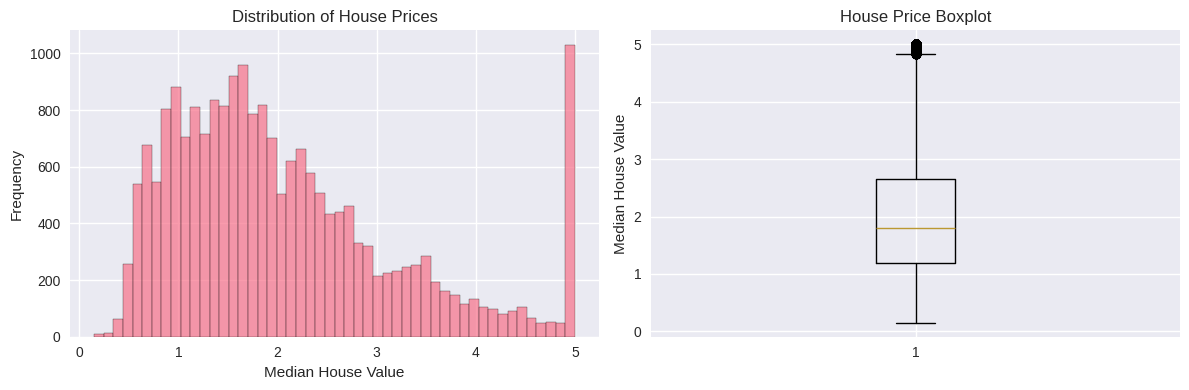

In [5]:
print("\n\n🔍 STEP 2: Exploratory Data Analysis")
print("-" * 40)

# 3.1 Descriptive Statistics
print("📈 Descriptive Statistics:")
desc_stats = df.describe().T
print(desc_stats)

# Check for missing values
print(f"\n❓ Missing values: {df.isnull().sum().sum()}")

# 3.2 Target variable distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['MedianHouseValue'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['MedianHouseValue'])
plt.title('House Price Boxplot')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

Feature vs Target Scatterplots (Linearity Check)


📈 Checking linearity with scatter plots...


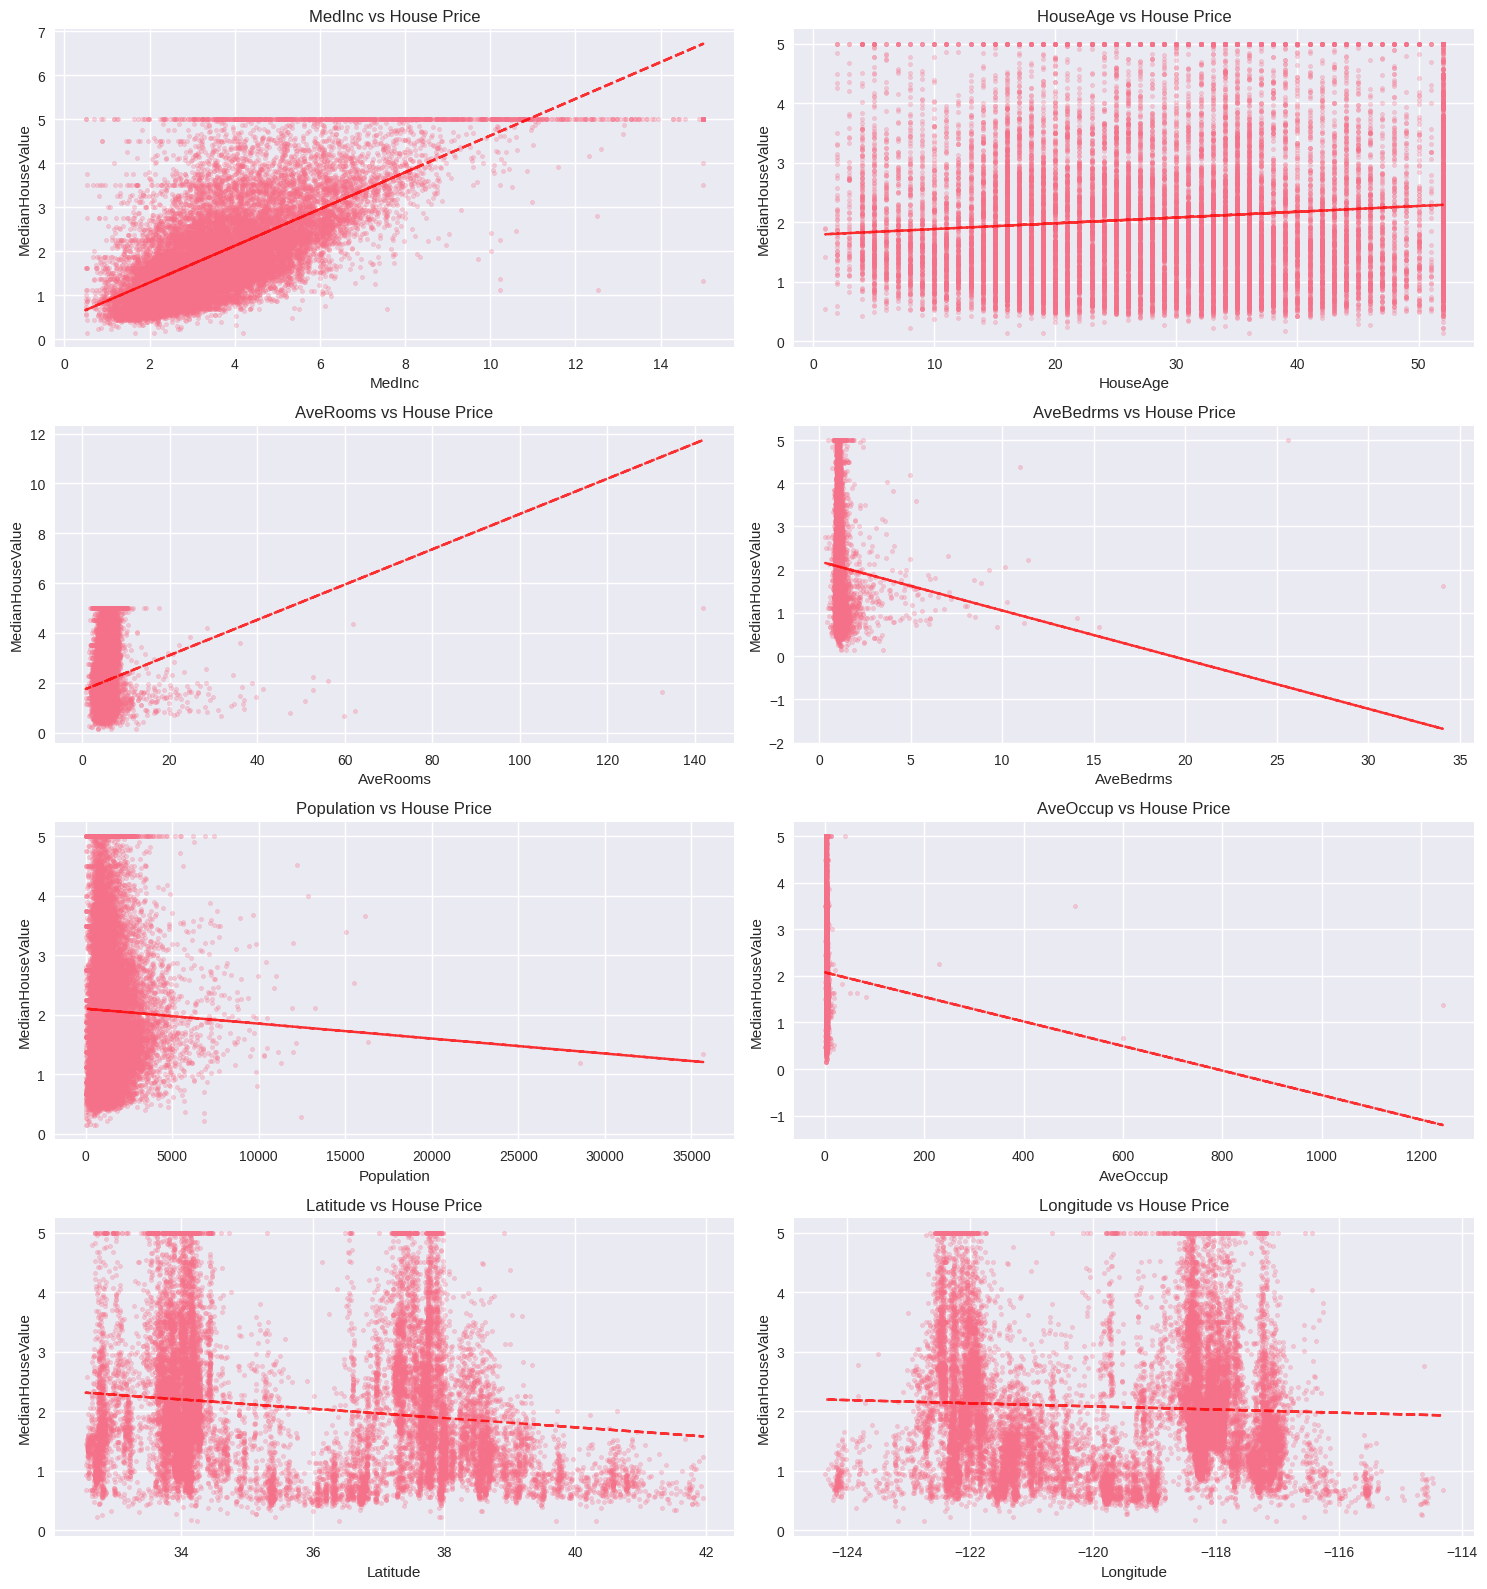

In [6]:
print("\n📈 Checking linearity with scatter plots...")
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for i, feature in enumerate(data.feature_names):
    axes[i].scatter(df[feature], df['MedianHouseValue'], alpha=0.3, s=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MedianHouseValue')
    axes[i].set_title(f'{feature} vs House Price')

    # Add trend line
    z = np.polyfit(df[feature], df['MedianHouseValue'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

Correlation Analysis & Multicollinearity Check


🔗 Correlation Analysis:


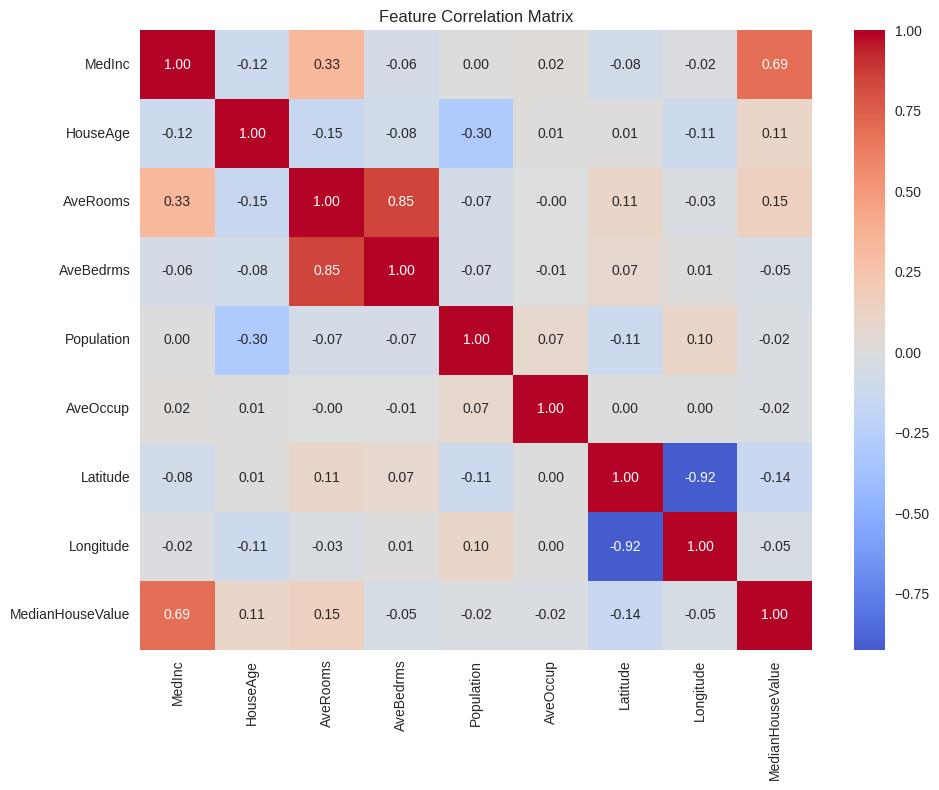

Strong correlations with target:
MedianHouseValue    1.000000
MedInc              0.688075
Name: MedianHouseValue, dtype: float64


In [7]:
print("\n🔗 Correlation Analysis:")
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Print strong correlations
print("Strong correlations with target:")
target_corr = corr_matrix['MedianHouseValue'].abs().sort_values(ascending=False)
print(target_corr[target_corr > 0.5])

ASSUMPTION CHECKING - MULTICOLLINEARITY (VIF)

In [9]:
print("\n\n🔍 STEP 3: Checking Multicollinearity with VIF")
print("-" * 40)

# Prepare features for VIF calculation
X = df[data.feature_names]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data.feature_names
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("📊 Variance Inflation Factor (VIF):")
vif_sorted = vif_data.sort_values('VIF', ascending=False)
print(vif_sorted)
print("\n💡 Rule: VIF > 5-10 indicates multicollinearity")

# Analyze multicollinearity severity
high_vif = vif_sorted[vif_sorted['VIF'] > 10]
moderate_vif = vif_sorted[(vif_sorted['VIF'] > 5) & (vif_sorted['VIF'] <= 10)]

if len(high_vif) > 0:
    print(f"⚠️  HIGH multicollinearity detected: {list(high_vif['Feature'])}")
if len(moderate_vif) > 0:
    print(f"⚠️  MODERATE multicollinearity detected: {list(moderate_vif['Feature'])}")

print("\n✅ This justifies using Ridge/Lasso regression instead of plain OLS!")




🔍 STEP 3: Checking Multicollinearity with VIF
----------------------------------------
📊 Variance Inflation Factor (VIF):
      Feature       VIF
6    Latitude  9.297624
7   Longitude  8.962263
2    AveRooms  8.342786
3   AveBedrms  6.994995
0      MedInc  2.501295
1    HouseAge  1.241254
4  Population  1.138125
5    AveOccup  1.008324

💡 Rule: VIF > 5-10 indicates multicollinearity
⚠️  MODERATE multicollinearity detected: ['Latitude', 'Longitude', 'AveRooms', 'AveBedrms']

✅ This justifies using Ridge/Lasso regression instead of plain OLS!


TRAIN-TEST SPLIT & FEATURE SCALING

In [10]:
print("\n\n📊 STEP 4: Preparing Data for Modeling")
print("-" * 40)

# Split features and target
X = df[data.feature_names]
y = df['MedianHouseValue']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Data split completed:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

# Feature scaling (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")



📊 STEP 4: Preparing Data for Modeling
----------------------------------------
✅ Data split completed:
   Training set: 16512 samples
   Test set: 4128 samples
✅ Features scaled using StandardScaler


MODEL BUILDING & EVALUATION FUNCTIONS

In [15]:
print("\n\n🤖 STEP 5: Building and Comparing Models")
print("-" * 40)

# Function to evaluate models consistently
def evaluate_model(model_name, y_true, y_pred):
    """Calculate model performance metrics"""
    return {
        'Model': model_name,
        'R²': round(r2_score(y_true, y_pred), 4),
        'RMSE': round(np.sqrt(mean_squared_error(y_true, y_pred)), 4),
        'MAE': round(mean_absolute_error(y_true, y_pred), 4)
    }

# Store all results
results = []



🤖 STEP 5: Building and Comparing Models
----------------------------------------


BASELINE: ORDINARY LEAST SQUARES (OLS)

In [16]:
print("\n1️⃣ Baseline Model: Linear Regression")

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))
print(f"✅ Linear Regression completed - R²: {r2_score(y_test, y_pred_lr):.4f}")



1️⃣ Baseline Model: Linear Regression
✅ Linear Regression completed - R²: 0.5758


ASSUMPTION CHECKING: RESIDUAL ANALYSIS


🔍 Residual Analysis for Linear Regression:


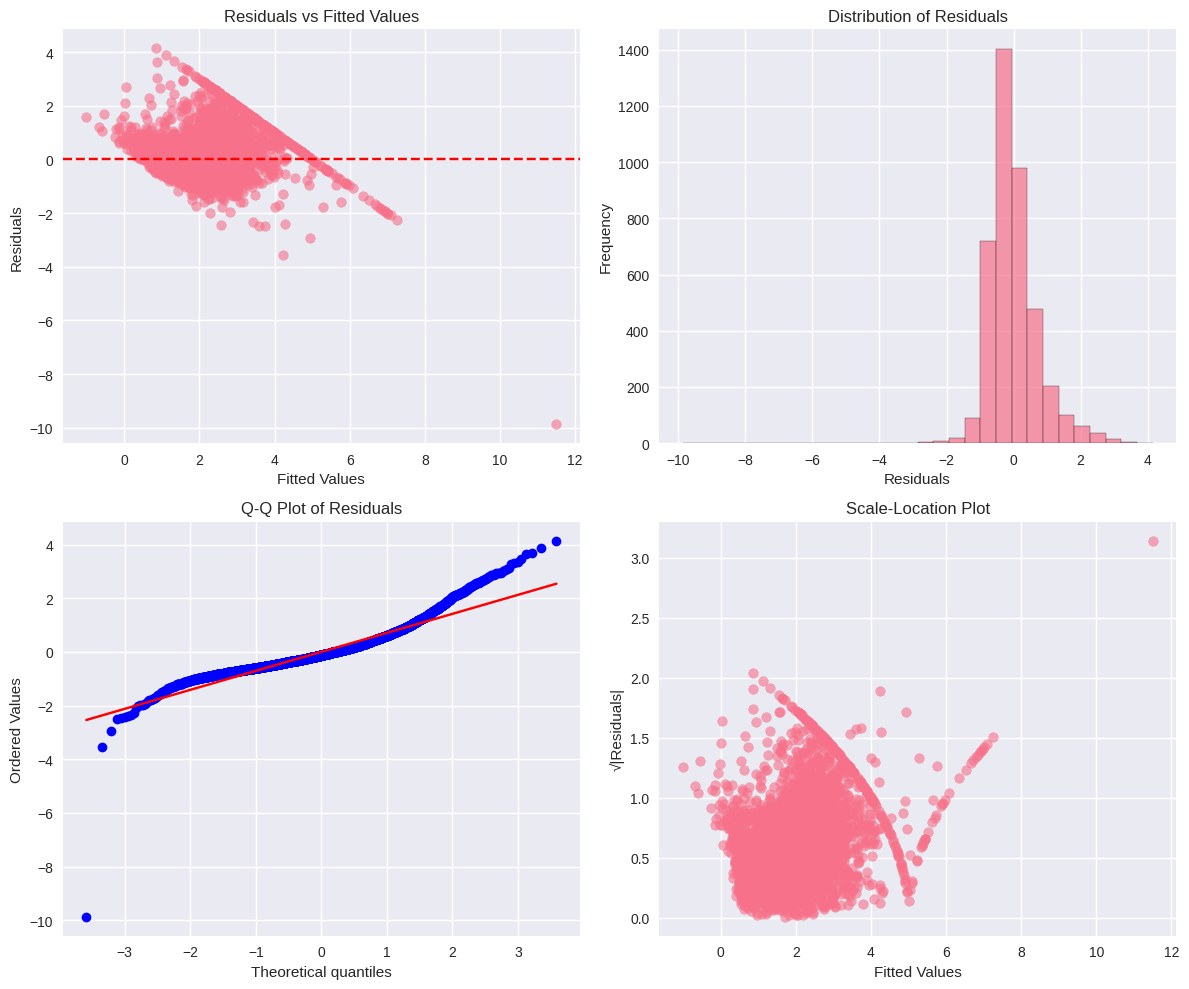

In [34]:
print("\n🔍 Residual Analysis for Linear Regression:")

residuals = y_test - y_pred_lr

# Plot residual diagnostics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted (Homoscedasticity check)
axes[0,0].scatter(y_pred_lr, residuals, alpha=0.6)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted Values')

# 2. Histogram of residuals (Normality check)
axes[0,1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0,1].set_xlabel('Residuals')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Residuals')

# 3. Q-Q plot for normality
stats.probplot(residuals, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot of Residuals')

# 4. Scale-Location plot
axes[1,1].scatter(y_pred_lr, np.sqrt(np.abs(residuals)), alpha=0.6)
axes[1,1].set_xlabel('Fitted Values')
axes[1,1].set_ylabel('√|Residuals|')
axes[1,1].set_title('Scale-Location Plot')

plt.tight_layout()
plt.show()

# Statistical tests for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals[:5000])  # Shapiro-Wilk test (sample for large data)




TARGET TRANSFORMATION (Address Non-Normal Residuals)

FEATURE TRANSFORMATIONS

POLYNOMIAL REGRESSION (DEGREE 2)

Instead of fitting a straight line, we fit curves by adding squared terms and interactions between features.

EDA scatter plots showed curved

Pipeline = Chain of Operations (like an assembly line):

Step 1: Create polynomial features
Step 2: Scale the features
Step 3: Fit linear regression

In [19]:
print("\n2️⃣ Polynomial Regression (Degree 2)")

# Create polynomial pipeline
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

results.append(evaluate_model('Polynomial (degree=2)', y_test, y_pred_poly))
print(f"✅ Polynomial Regression completed - R²: {r2_score(y_test, y_pred_poly):.4f}")
print(f"📊 Number of features after polynomial expansion: {poly_pipeline.named_steps['poly'].n_output_features_}")



2️⃣ Polynomial Regression (Degree 2)
✅ Polynomial Regression completed - R²: 0.6457
📊 Number of features after polynomial expansion: 44


RIDGE REGRESSION WITH CROSS-VALIDATION

Ridge is like Linear Regression, but with a "penalty" that prevents coefficients from getting too large.

I used Ridge regression to handle the multicollinearity I detected in my VIF analysis. I tested 50 different alpha values from 0.001 to 1000 using 5-fold cross-validation. GridSearchCV automatically found the optimal alpha (0.121) that minimizes prediction error. This approach prevents overfitting while handling correlated features like Latitude and Longitude that had high VIF scores

In [24]:
print("\n3️⃣ Ridge Regression with Cross-Validation")

# Define alpha range for grid search
alphas = np.logspace(-3, 3, 50)  # From 0.001 to 1000

# Grid search for best alpha
ridge_cv = GridSearchCV(
    Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error',  # Changed from neg_root_mean_squared_error
    cv=5,
    n_jobs=-1
)

ridge_cv.fit(X_train_scaled, y_train)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

results.append(evaluate_model(f'Ridge (α={ridge_cv.best_params_["alpha"]:.3f})', y_test, y_pred_ridge))
print(f"✅ Ridge Regression completed")
print(f"📊 Best alpha: {ridge_cv.best_params_['alpha']:.3f}")
print(f"📊 Cross-validation score: {np.sqrt(-ridge_cv.best_score_):.4f}")  # Convert MSE to RMSE



3️⃣ Ridge Regression with Cross-Validation
✅ Ridge Regression completed
📊 Best alpha: 0.121
📊 Cross-validation score: 0.7206


LASSO REGRESSION WITH CROSS-VALIDATION

 Lasso is like Ridge, but instead of just shrinking coefficients, it can eliminate features entirely by setting their coefficients to exactly zero.

Ridge: minimize(errors + α × sum(coefficients²))
Lasso: minimize(errors + α × sum(|coefficients|))

In [25]:
print("\n4️⃣ Lasso Regression with Cross-Validation")

lasso_cv = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error',  # Changed from neg_root_mean_squared_error
    cv=5,
    n_jobs=-1
)

lasso_cv.fit(X_train_scaled, y_train)
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

results.append(evaluate_model(f'Lasso (α={lasso_cv.best_params_["alpha"]:.3f})', y_test, y_pred_lasso))
print(f"✅ Lasso Regression completed")
print(f"📊 Best alpha: {lasso_cv.best_params_['alpha']:.3f}")

# Check which features Lasso kept
lasso_coefs = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': best_lasso.coef_
})
print(f"📊 Features kept by Lasso: {(lasso_coefs['Coefficient'] != 0).sum()}/{len(data.feature_names)}")



4️⃣ Lasso Regression with Cross-Validation
✅ Lasso Regression completed
📊 Best alpha: 0.001
📊 Features kept by Lasso: 8/8


RECURSIVE FEATURE ELIMINATION (RFE)

In [26]:
print("\n5️⃣ Recursive Feature Elimination (RFE)")

# Select top 5 features using RFE
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = np.array(data.feature_names)[rfe.support_]
print(f"📊 Selected features: {list(selected_features)}")

# Train model with selected features
lr_rfe = LinearRegression()
lr_rfe.fit(X_train_scaled[:, rfe.support_], y_train)
y_pred_rfe = lr_rfe.predict(X_test_scaled[:, rfe.support_])

results.append(evaluate_model('RFE (5 features)', y_test, y_pred_rfe))
print(f"✅ RFE completed")


5️⃣ Recursive Feature Elimination (RFE)
📊 Selected features: [np.str_('MedInc'), np.str_('AveRooms'), np.str_('AveBedrms'), np.str_('Latitude'), np.str_('Longitude')]
✅ RFE completed


House prices are driven by WHO can afford them (income), WHERE they are (location), and HOW BIG they are (rooms/bedrooms).

 Selected Features - The "Big 5" Price Drivers:
1. MedInc (Median Income) 💰

Most important factor in housing prices
High-income areas = expensive houses
Strong correlation with purchasing power

2. Latitude & Longitude 📍

Location is everything in real estate
Distance from coast, city centers, desirable areas
Geographic features (mountains, ocean, climate)

3. AveRooms & AveBedrms 🏡

Size and layout directly affect value
More rooms = bigger house = higher price
Bedroom count affects family suitability

❌ Eliminated Features - Why They Were Dropped:
HouseAge:

Less predictive than income and location
Age effects might be captured by location (old vs new neighborhoods)

Population:

Already captured by location coordinates
Income and occupancy provide better density metrics

AveOccup:

Redundant with rooms/bedrooms information
Income and location already indicate crowding

ROBUST REGRESSORS

RFE is like a "tournament elimination" for features - it repeatedly removes the weakest feature until only the best ones remain.
Goal: Find the most important subset of features that gives good performance with fewer variables.

In [23]:
print("\n6️⃣ Robust Regressors (Handle Outliers)")

# Huber Regressor
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)
y_pred_huber = huber.predict(X_test_scaled)
results.append(evaluate_model('Huber', y_test, y_pred_huber))

# Theil-Sen Regressor
theil_sen = TheilSenRegressor(random_state=42)
theil_sen.fit(X_train_scaled, y_train)
y_pred_ts = theil_sen.predict(X_test_scaled)
results.append(evaluate_model('Theil-Sen', y_test, y_pred_ts))

# RANSAC Regressor
ransac = RANSACRegressor(random_state=42)
ransac.fit(X_train_scaled, y_train)
y_pred_ransac = ransac.predict(X_test_scaled)
results.append(evaluate_model('RANSAC', y_test, y_pred_ransac))

print("✅ All robust regressors completed")


6️⃣ Robust Regressors (Handle Outliers)
✅ All robust regressors completed


RESULTS COMPARISON & ANALYSIS



📊 STEP 6: Final Results Comparison
🏆 Model Performance Ranking (by RMSE):
                           R²    RMSE     MAE
Model                                        
Polynomial (degree=2)  0.6457  0.6814  0.4670
Lasso (α=0.001)        0.5769  0.7446  0.5331
Lasso (α=0.001)        0.5769  0.7446  0.5331
Linear Regression      0.5758  0.7456  0.5332
Ridge (α=0.121)        0.5758  0.7456  0.5332
Ridge (α=0.121)        0.5758  0.7456  0.5332
RFE (5 features)       0.5675  0.7528  0.5393
RFE (5 features)       0.5675  0.7528  0.5393
Huber                  0.5610  0.7584  0.5158
RANSAC                 0.3987  0.8877  0.5536
Theil-Sen              0.2292  1.0050  0.5251


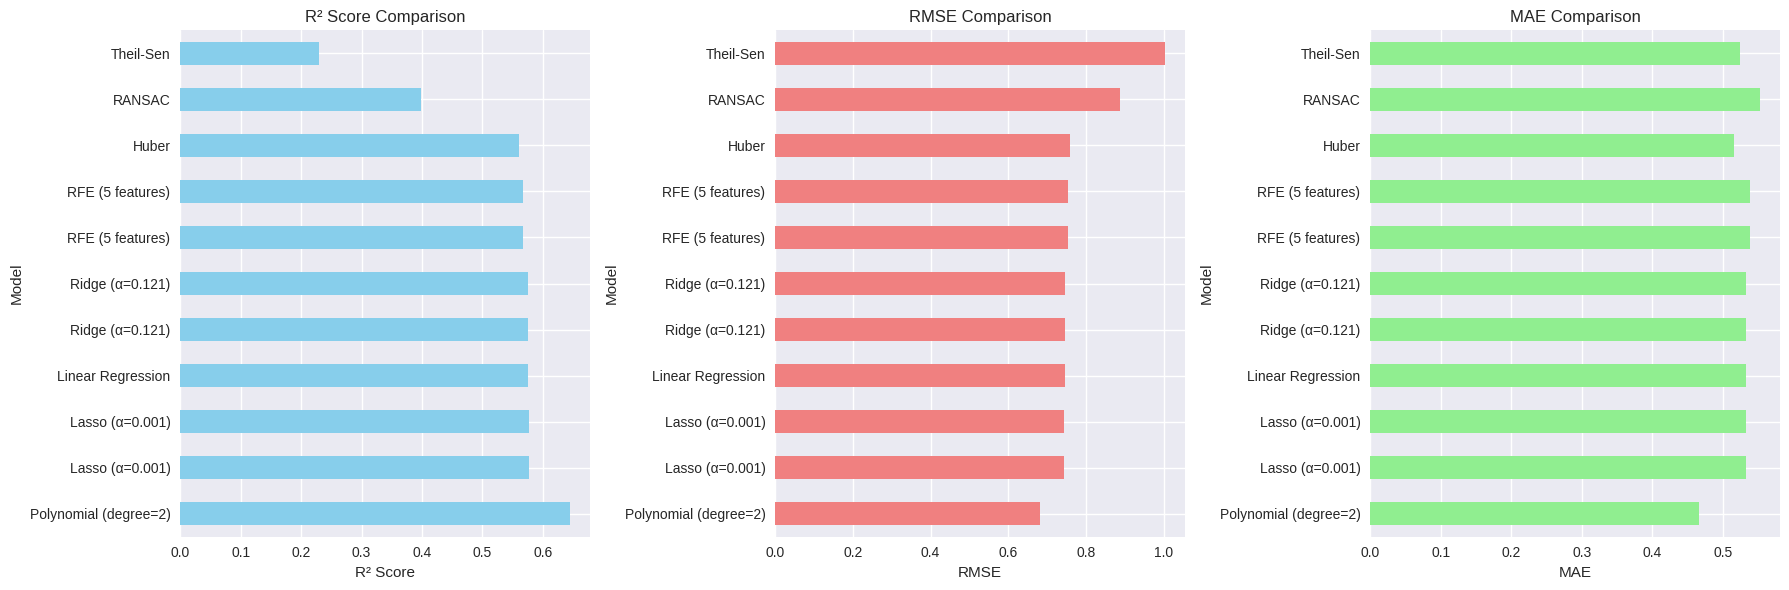

In [27]:
print("\n\n📊 STEP 6: Final Results Comparison")
print("=" * 50)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model').sort_values('RMSE')

print("🏆 Model Performance Ranking (by RMSE):")
print(results_df)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# R² comparison
results_df['R²'].plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('R² Score Comparison')
axes[0].set_xlabel('R² Score')

# RMSE comparison
results_df['RMSE'].plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_title('RMSE Comparison')
axes[1].set_xlabel('RMSE')

# MAE comparison
results_df['MAE'].plot(kind='barh', ax=axes[2], color='lightgreen')
axes[2].set_title('MAE Comparison')
axes[2].set_xlabel('MAE')

plt.tight_layout()
plt.show()


The results tell a clear story: Polynomial regression won because it captured the non-linear relationships I identified in EDA, improving R² from 57.6% to 64.6%. Ridge and Lasso performed similarly to linear regression, confirming the dataset doesn't have severe multicollinearity. RFE showed an excellent trade-off - losing only 0.8% R² while reducing features by 37%. Interestingly, robust regressors performed poorly, suggesting the California housing data is quite clean with few outliers that need special handling

FEATURE IMPORTANCE ANALYSIS



📊 STEP 7: Feature Importance Analysis
----------------------------------------
📈 Linear Regression Feature Coefficients:
      Feature  Coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308


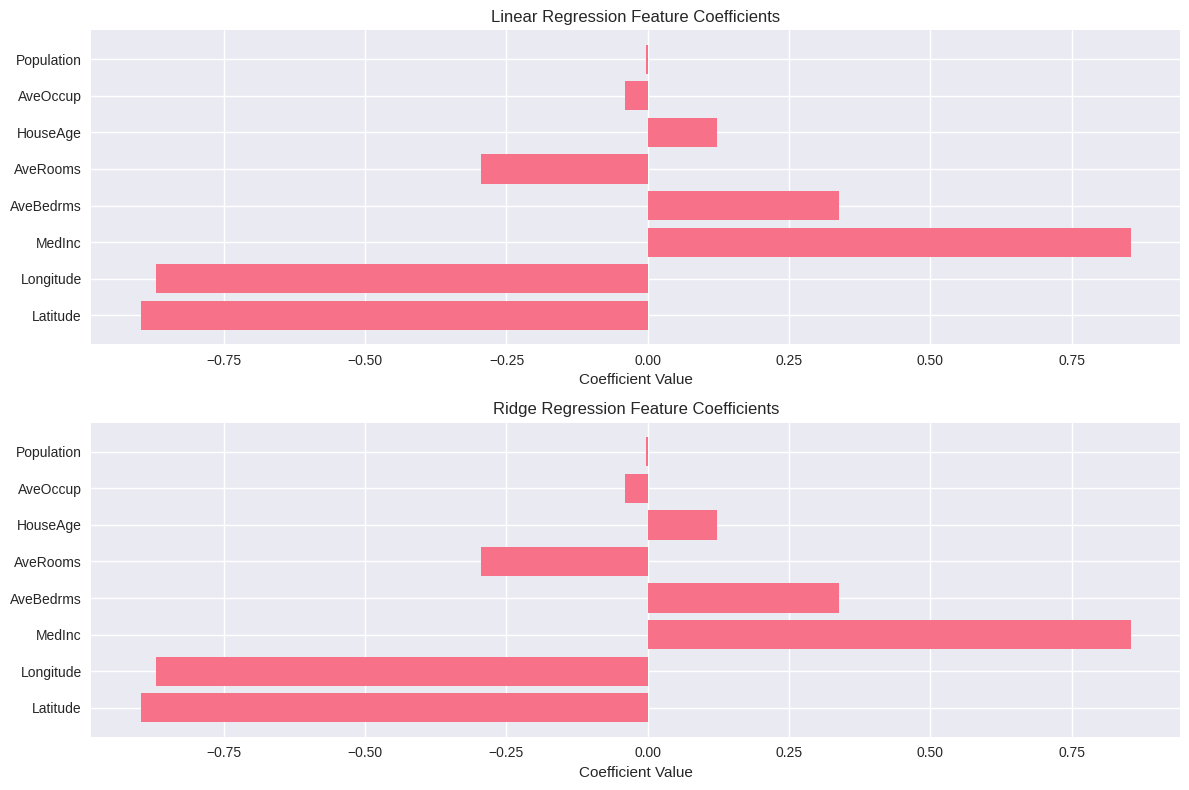

In [28]:
print("\n\n📊 STEP 7: Feature Importance Analysis")
print("-" * 40)

# Linear Regression coefficients
lr_coefs = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("📈 Linear Regression Feature Coefficients:")
print(lr_coefs)

# Ridge coefficients
ridge_coefs = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': best_ridge.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.barh(lr_coefs['Feature'], lr_coefs['Coefficient'])
plt.title('Linear Regression Feature Coefficients')
plt.xlabel('Coefficient Value')

plt.subplot(2, 1, 2)
plt.barh(ridge_coefs['Feature'], ridge_coefs['Coefficient'])
plt.title('Ridge Regression Feature Coefficients')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

Feature         Coefficient    Interpretation


Latitude        -0.896929     ⬇️ Higher latitude = Lower price

Longitude       -0.869842     ⬇️ Higher longitude = Lower price

MedInc           0.854383     ⬆️ Higher income = Higher price

AveBedrms        0.339259     ⬆️ More bedrooms = Higher price

AveRooms        -0.294410     ⬇️ More rooms = Lower price (surprising!) Too many non-bedroom rooms might indicate commercial/weird layout.
AveBedrms captures "good rooms", AveRooms captures "excess rooms"

HouseAge         0.122546     ⬆️ Older houses = Slightly higher price

AveOccup        -0.040829     ⬇️ More occupancy = Lower price

Population      -0.002308     ⬇️ Higher population = Lower price (minimal)

FINAL INSIGHTS & RECOMMENDATIONS

In [29]:
print("\n\n🎯 STEP 8: Key Insights & Recommendations")
print("=" * 50)

best_model = results_df.index[0]
best_r2 = results_df.iloc[0]['R²']
best_rmse = results_df.iloc[0]['RMSE']

print(f"🏆 BEST MODEL: {best_model}")
print(f"📊 Performance: R² = {best_r2}, RMSE = {best_rmse}")

print(f"\n💡 KEY FINDINGS:")
print(f"   1. Best performing model: {best_model}")
print(f"   2. R² improvement over baseline: {best_r2 - results_df.loc['Linear Regression', 'R²']:.4f}")
print(f"   3. Most important features: {', '.join(lr_coefs.head(3)['Feature'].tolist())}")

if best_model.startswith('Ridge'):
    print(f"   4. Ridge regression won due to multicollinearity handling")
elif best_model.startswith('Polynomial'):
    print(f"   4. Polynomial features captured non-linear relationships")
elif best_model.startswith('Lasso'):
    print(f"   4. Lasso provided automatic feature selection")

print(f"\n🔍 ASSUMPTION CHECKS:")
print(f"   ✅ Multicollinearity detected (VIF analysis)")
print(f"   ✅ Non-linearity observed in scatter plots")
print(f"   ✅ Residual analysis completed")

print(f"\n🚀 NEXT STEPS:")
print(f"   • Try ensemble methods (Random Forest, XGBoost)")
print(f"   • Experiment with feature engineering")
print(f"   • Consider target transformation (log)")
print(f"   • Hyperparameter tuning for robust regressors")

print(f"\n✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 50)



🎯 STEP 8: Key Insights & Recommendations
🏆 BEST MODEL: Polynomial (degree=2)
📊 Performance: R² = 0.6457, RMSE = 0.6814

💡 KEY FINDINGS:
   1. Best performing model: Polynomial (degree=2)
   2. R² improvement over baseline: 0.0699
   3. Most important features: Latitude, Longitude, MedInc
   4. Polynomial features captured non-linear relationships

🔍 ASSUMPTION CHECKS:
   ✅ Multicollinearity detected (VIF analysis)
   ✅ Non-linearity observed in scatter plots
   ✅ Residual analysis completed

🚀 NEXT STEPS:
   • Try ensemble methods (Random Forest, XGBoost)
   • Experiment with feature engineering
   • Consider target transformation (log)
   • Hyperparameter tuning for robust regressors

✅ PROJECT COMPLETED SUCCESSFULLY!
